Thats how it goes like

<font color = 'green'>
    
Step 1: Define Problem.
    
Step 2: Prepare Data.
    
Step 3: Evaluate Models.
    
Step 4: Finalize Model.

---
## Step 2
    
- Data Cleaning: Identifying and correcting mistakes or errors in the data.
- Feature Selection: Identifying those input variables that are most relevant to the task.
- Data Transforms: Changing the scale or distribution of variables.
- Feature Engineering: Deriving new variables from available data.
- Dimensionality Reduction: Creating compact projections of the data.

---



# Title
![horse](colic.jpg)
## Introduction


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# Read in the dataset
colic = pd.read_csv('horse-colic.csv', header=None)
colic

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,534817,39.2,88,20,?,?,4,1,...,50,85,2,2,3,2,2208,0,0,2
2,2,1,530334,38.30,40,24,1,1,3,1,...,33.00,6.70,?,?,1,2,0,0,0,1
3,1,9,5290409,39.10,164,84,4,1,6,2,...,48.00,7.20,3,5.30,2,1,2208,0,0,1
4,2,1,530255,37.30,104,35,?,?,6,2,...,74.00,7.40,?,?,2,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,1,533886,?,120,70,4,?,4,2,...,55,65,?,?,3,2,3205,0,0,2
296,2,1,527702,37.20,72,24,3,2,4,2,...,44.00,?,3,3.30,3,1,2208,0,0,1
297,1,1,529386,37.50,72,30,4,3,4,1,...,60.00,6.80,?,?,2,1,3205,0,0,2
298,1,1,530612,36.50,100,24,3,3,3,1,...,50.00,6.00,3,3.40,1,1,2208,0,0,1


- First thing that catches the attention is the presence of **?**
- These are the NaNs camouflaged as question marks 

Lets re-read the dataset, specifying these question marks to be np.nan

In [3]:
# Re-Read in the dataset
colic = pd.read_csv('horse-colic.csv', header=None, na_values='?')
colic

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,1,533886,NaN,120.0,70.0,4.0,NaN,4.0,2.0,...,55.0,65.0,NaN,NaN,3.0,2,3205,0,0,2
296,2.0,1,527702,37.2,72.0,24.0,3.0,2.0,4.0,2.0,...,44.0,NaN,3.0,3.3,3.0,1,2208,0,0,1
297,1.0,1,529386,37.5,72.0,30.0,4.0,3.0,4.0,1.0,...,60.0,6.8,NaN,NaN,2.0,1,3205,0,0,2
298,1.0,1,530612,36.5,100.0,24.0,3.0,3.0,3.0,1.0,...,50.0,6.0,3.0,3.4,1.0,1,2208,0,0,1


In [4]:
for col in colic.columns:
    col = col
    null_vals = colic[col].isnull().sum()
    perc_null = int(colic[col].isnull().sum()/colic[col].shape*100)
    print(col, 'Missing Vals:', null_vals,'\t', 'Percentage Missing Vals:', str(perc_null)+'%')

0 Missing Vals: 1 	 Percentage Missing Vals: 0%
1 Missing Vals: 0 	 Percentage Missing Vals: 0%
2 Missing Vals: 0 	 Percentage Missing Vals: 0%
3 Missing Vals: 60 	 Percentage Missing Vals: 20%
4 Missing Vals: 24 	 Percentage Missing Vals: 8%
5 Missing Vals: 58 	 Percentage Missing Vals: 19%
6 Missing Vals: 56 	 Percentage Missing Vals: 18%
7 Missing Vals: 69 	 Percentage Missing Vals: 23%
8 Missing Vals: 47 	 Percentage Missing Vals: 15%
9 Missing Vals: 32 	 Percentage Missing Vals: 10%
10 Missing Vals: 55 	 Percentage Missing Vals: 18%
11 Missing Vals: 44 	 Percentage Missing Vals: 14%
12 Missing Vals: 56 	 Percentage Missing Vals: 18%
13 Missing Vals: 104 	 Percentage Missing Vals: 34%
14 Missing Vals: 106 	 Percentage Missing Vals: 35%
15 Missing Vals: 247 	 Percentage Missing Vals: 82%
16 Missing Vals: 102 	 Percentage Missing Vals: 34%
17 Missing Vals: 118 	 Percentage Missing Vals: 39%
18 Missing Vals: 29 	 Percentage Missing Vals: 9%
19 Missing Vals: 33 	 Percentage Missing Val

Visualization might provide us with a bit more clear view

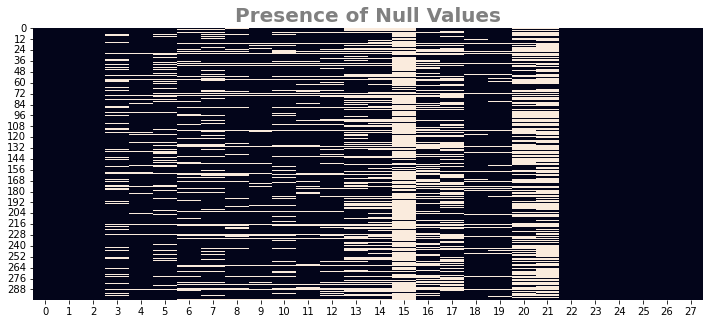

In [5]:
plt.figure(figsize=(12,5))
sns.heatmap(colic.isnull(), cbar=False)
plt.title('Presence of Null Values', fontsize=20, weight='bold', c='grey')
plt.show()

- We have lots of null values, hence, deletion shouldn't be the first option
- Secondly, the null values are scattered through out more than the half of the features, so the features can't be dropped either.
- We will resort on other options, such as 
    - Simple Imputation using either mean, mode or median (or a constant)
    - k-Nearest Neighbors Imputation 
    - Iterative Imputation also known as (Fully Conditional Specification or MultiVariate Imputation with chained equations)

At this stage, I will move on to develope a function that trains and tests the model using different strategies of handling the null values. 

In [6]:
# Importing necessary libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Importing Imputers
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [7]:
# Splitting the dataset into predictors and labels
data = colic.values
X = data[:,:-1]
y = data[:, -1]

##### Using Simple Imputer
A simple and popular approach to data imputation involves using statistical methods to estimate a value for a column from those values that are present, then replace all missing values in the column with the calculated statistic.

mean 0.8466666666666666 0.056174331821175726
median 0.8355555555555554 0.05086899174337598
most_frequent 0.8377777777777778 0.05356431463641755


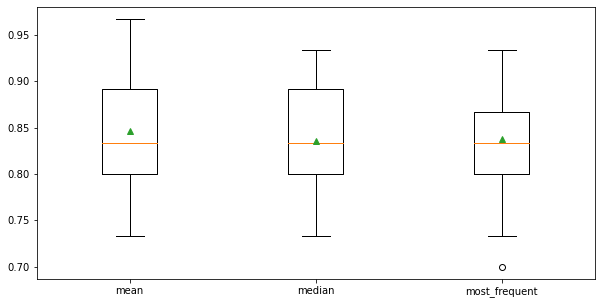

In [8]:
results_si = []
strategies = ['mean', 'median', 'most_frequent']
for strategy in strategies:
    # creating a model pipeline
    pipeline = Pipeline(steps=[('imputer', SimpleImputer(strategy=strategy)), 
                               ('model', RandomForestClassifier())])
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    # store the results 
    results_si.append(scores)
    print(strategy, np.mean(scores), np.std(scores))
    
# Visualize
plt.figure(figsize=(10,5))
plt.boxplot(results_si, labels=strategies, showmeans=True)
plt.show()

##### Using kNN Imputer
One popular technique for imputation is a K-nearest neighbor model. A new sample is imputed by finding the samples in the training set "closest" to it and averages these nearby points to fill in the value.

1 0.6855555555555556 0.07184516960145428
3 0.7411111111111112 0.07585724083865907
5 0.7633333333333333 0.07115450065149052
7 0.7822222222222223 0.05559998223643027
9 0.8 0.06776866969767516
11 0.788888888888889 0.07470105028431831
13 0.8088888888888889 0.06378977819736589
15 0.7911111111111111 0.07041324230113274
17 0.8066666666666668 0.0679869268479038
19 0.8133333333333331 0.06301087501670147
21 0.8222222222222223 0.05921294486432992


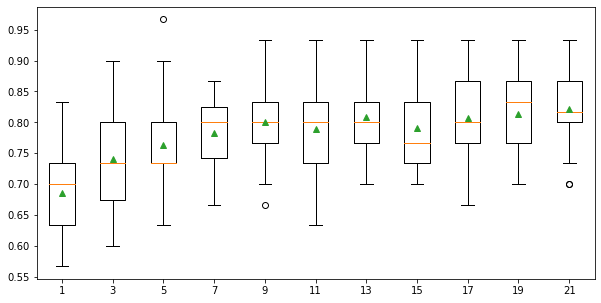

In [9]:
results_ki = []
n_neighbors = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
for k in n_neighbors:
    # creating model pipeline
    pipeline = Pipeline(steps=[('neighbors', KNNImputer(n_neighbors=k)), 
                              ('model', RandomForestClassifier())])
    
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    # store results
    results_ki.append(scores)
    print(k, np.mean(scores), np.std(scores))
    
# Visualize
plt.figure(figsize=(10,5))
plt.boxplot(results_ki, labels=n_neighbors, showmeans=True)
plt.show()

##### Using Iterative Imputer
In Iterative Imputation, each feature is modelled as a funciton of the other features. Each feature is imputed sequentially, one after another, allowing prior imputed values to be used as well. The process is repeated iteratively, allowing ever improved estimates of missing values to be calculated as missing values across all the features are estimated.
We will use Iterative imputer with respect to 
1. Order 
2. Maximum number of iteration

ascending 0.8166666666666668 0.06978803887752091
descending 0.7955555555555555 0.05492980930803677
roman 0.8133333333333332 0.06644407283433801
arabic 0.8155555555555555 0.05286834334831254
random 0.808888888888889 0.057046656235526405


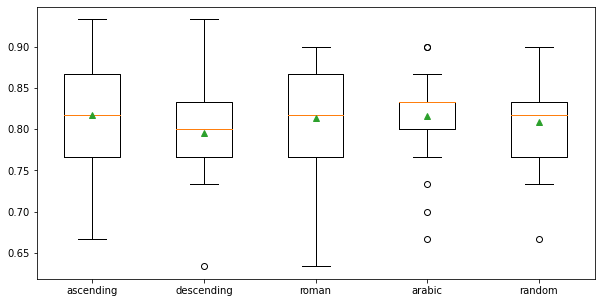

In [11]:
results_ii_order = []
order = ['ascending', 'descending', 'roman', 'arabic', 'random'] # Arabic means from right to left, and Roman means the contrary

for o in order:
    # Creating a model pipeline
    pipeline = Pipeline(steps=[('ii', IterativeImputer(imputation_order=o)), 
                               ('model', RandomForestClassifier())])
    # Evaluating the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # store the results
    results_ii_order.append(scores)
    print(o, np.mean(scores), np.std(scores))

# Visualize
plt.figure(figsize=(10,5))
plt.boxplot(results_ii_order, labels=order, showmeans=True)
plt.show()

0 0.8444444444444446 0.05043024763515652
1 0.8055555555555556 0.057143959424994645
2 0.8122222222222224 0.06054281211477905
3 0.8077777777777777 0.06422376007385969
4 0.8022222222222222 0.07837863150465955
5 0.8188888888888889 0.06536696035592325
6 0.8 0.05900408021045226
7 0.8033333333333332 0.05922336876105082
8 0.8077777777777778 0.06536696035592324
9 0.8044444444444445 0.08152860590152954
10 0.8133333333333332 0.06863753427324668
11 0.7899999999999998 0.06391545341453182
12 0.8077777777777777 0.07437807987190917
13 0.8144444444444445 0.07487438039480644
14 0.8044444444444444 0.06816827400079097
15 0.8133333333333332 0.059379507626166186
16 0.808888888888889 0.062023492164234965
17 0.7966666666666666 0.07569431702333825
18 0.8233333333333334 0.06215273898198667
19 0.8011111111111109 0.07070194786636905
20 0.7955555555555556 0.07922463764433729


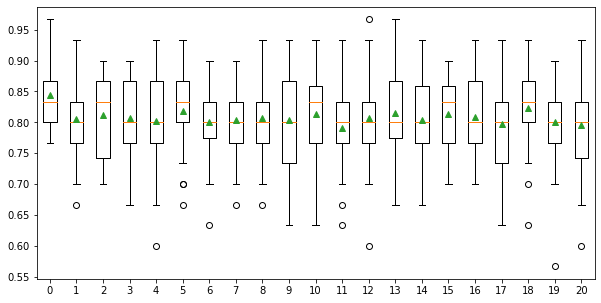

In [12]:
results_ii_iter = []
max_iterations = np.arange(0,21,1)

for max_iter in max_iterations:
    # Creating a model pipeline
    pipeline = Pipeline(steps=[('ii', IterativeImputer(max_iter=max_iter)), 
                               ('model', RandomForestClassifier())])
    # Evaluating the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # store the results
    results_ii_iter.append(scores)
    print(max_iter, np.mean(scores), np.std(scores))

# Visualize
plt.figure(figsize=(10,5))
plt.boxplot(results_ii_iter, labels=max_iterations, showmeans=True)
plt.show()

<font color = 'red'> From this point, no further procedure in the book on this dataset 